# Importo drive


In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Mounted at /content/gdrive


# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
#=
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.10.3" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi
=#

Installing Julia 1.10.3 on the current Colab Runtime...
2024-06-30 22:07:12 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.10/julia-1.10.3-linux-x86_64.tar.gz [173495204/173495204] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.10

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [1]:
# versioninfo() #recargar pestaña en colab para que funcione

Julia Version 1.10.3
Commit 0b4590a5507 (2024-04-30 10:59 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, broadwell)
Threads: 2 default, 0 interactive, 1 GC (on 2 virtual cores)
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = 2


# Instalación de paquetes a utilizar

In [2]:
using Pkg

In [3]:
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("Dates")
Pkg.add("Statistics")
Pkg.add("Plots")
Pkg.add("ScikitLearn")
Pkg.add("GLM")
Pkg.add("MLJ")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed SentinelArrays ────────────── v1.4.3
   Installed Crayons ───────────────────── v4.1.1
   Installed DataAPI ───────────────────── v1.16.0
   Installed PooledArrays ──────────────── v1.4.3
   Installed Tables ────────────────────── v1.11.1
   Installed TableTraits ───────────────── v1.0.1
   Installed InlineStrings ─────────────── v1.4.1
   Installed PrettyTables ──────────────── v2.3.2
   Installed DataValueInterfaces ───────── v1.0.0
   Installed LaTeXStrings ──────────────── v1.3.1
   Installed OrderedCollections ────────── v1.6.3
   Installed InvertedIndices ───────────── v1.3.0
   Installed Reexport ──────────────────── v1.2.2
   Installed IteratorInterfaceExtensions ─ v1.0.0
   Installed DataStructures ────────────── v0.18.20
   Installed Compat ────────────────────── v4.15.0
   Installed Missings ──────────────────── v1.2.0
   Installed StringManipulation ────────── v0.3.4
  

In [4]:
using DataFrames
using CSV
using Dates
using Statistics
using Plots
using Random
using ScikitLearn
using GLM
using MLJ

# Procesamiento data - split train/validation

In [ ]:
movies_csv = "data_output/data_to_analyze.csv" #utilizar el path donde se tenga guardado el csv localmente

"/content/gdrive/MyDrive/tdl/tp_data.csv"

In [ ]:
movies = DataFrame(CSV.read(movies_csv, DataFrame))

Row,imdbId,type,year,duration,genres,rating,votes,reviews,directors,cast,country,releaseDate,keywords,companies
,String15,String15,Int64?,Float64?,String?,Float64,Float64,Float64?,String?,String?,String?,Date?,String?,String?
1,tt0001082,movie,1909,missing,missing,5.0,2.0,missing,missing,missing,MX,1909-01-01,missing,missing
2,tt0002665,movie,1913,7.0,['Comedy'],5.0,1.0,missing,['Max Urban'],"['Tadeusz Dura', 'Marie Šlechtová', 'Adolf Krössing', 'Emil Pollert', 'Emil Burian', 'Věra Pivoňková', 'Karel Hruška', 'Ema Miřiovská', 'Gabriela Horvátová', 'Otakar Chmel']",missing,1913-10-03,"['opera', 'lost film']",['ASUM']
3,tt0033581,movie,1941,18.0,missing,0.0,0.0,missing,missing,missing,missing,1941-02-14,missing,missing
4,tt0062431,movie,1967,missing,['Drama'],0.0,0.0,missing,['Jiří Vanýsek'],"['Josef Šebek', 'Jana Tomečková', 'Josef Kemr', 'Arna Mohelská', 'Vlasta Peterková', 'Jaroslav Kaňkovský', 'Libuše Geprtová', 'Marie Pavlíková', 'Tomáš Čisárik', 'Jiří Dušek', 'Karel Kabíček', 'Luboš Vraspír', 'Miroslav Donutil', 'Vladimír Plšek', 'Blažena Rýznarová', 'Karel Mišurec', 'Arnošt Parsch', 'Jaroslav Rosendorf']",XC,1972-09-04,['based on short story'],['Československá televize Brno']
5,tt0075835,movie,1977,missing,missing,5.0,1.0,missing,missing,missing,MX,1977-01-01,missing,missing
6,tt0078803,movie,1979,missing,missing,5.0,2.0,missing,missing,missing,MX,1979-01-01,missing,missing
7,tt0090174,movie,1985,missing,['Documentary'],0.0,0.0,missing,['Vincent Monnikendam'],missing,NL,1985-01-01,['migrant worker'],missing
8,tt0100733,movie,1990,10.0,missing,0.0,0.0,missing,['Franz Leopold Schmelzer'],['Rainer Doppler'],AT,1990-12-16,missing,"['Hochschule für Musik und darstellende Kunst, Wien']"
9,tt0104324,movie,1992,12.0,missing,9.5,1.0,missing,"['Norbert Trummer', 'Martin Kaltner', 'Thomas Baumann']","['Norbert Trummer', 'Martin Kaltner']",AT,1992-01-01,missing,missing


Eliminamos posibles filas (o ids) repetidas

In [ ]:
unique!(movies); #filtra rows repetidas (in-place)
movies = unique(movies, :imdbId); # filtra ids repetidos (no inplace)

Identificamos que hay ratings 0.0 de peliculas con 0 votos, cosa que no tiene sentido. Los consideramos data erronea y los eliminamos.

In [ ]:
filter(row -> row.votes <= 0, movies)

Row,imdbId,type,year,duration,genres,rating,votes,reviews,directors,cast,country,releaseDate,keywords,companies
,String15,String15,Int64?,Float64?,String?,Float64,Float64,Float64?,String?,String?,String?,Date?,String?,String?
1,tt0033581,movie,1941,18.0,missing,0.0,0.0,missing,missing,missing,missing,1941-02-14,missing,missing
2,tt0062431,movie,1967,missing,['Drama'],0.0,0.0,missing,['Jiří Vanýsek'],"['Josef Šebek', 'Jana Tomečková', 'Josef Kemr', 'Arna Mohelská', 'Vlasta Peterková', 'Jaroslav Kaňkovský', 'Libuše Geprtová', 'Marie Pavlíková', 'Tomáš Čisárik', 'Jiří Dušek', 'Karel Kabíček', 'Luboš Vraspír', 'Miroslav Donutil', 'Vladimír Plšek', 'Blažena Rýznarová', 'Karel Mišurec', 'Arnošt Parsch', 'Jaroslav Rosendorf']",XC,1972-09-04,['based on short story'],['Československá televize Brno']
3,tt0090174,movie,1985,missing,['Documentary'],0.0,0.0,missing,['Vincent Monnikendam'],missing,NL,1985-01-01,['migrant worker'],missing
4,tt0100733,movie,1990,10.0,missing,0.0,0.0,missing,['Franz Leopold Schmelzer'],['Rainer Doppler'],AT,1990-12-16,missing,"['Hochschule für Musik und darstellende Kunst, Wien']"
5,tt0105732,movie,1992,45.0,['Documentary'],0.0,0.0,missing,['Franz Leopold Schmelzer'],"['Robert Hauer-Riedl', 'Ulrike Benko']",missing,1992-01-01,missing,"['Hochschule für Musik und darstellende Kunst, Wien']"
6,tt0108280,movie,1993,missing,['Documentary'],0.0,0.0,missing,['Leopold Lummerstorfer'],missing,AT,1993-01-01,missing,['Filmlokomotive']
7,tt0111805,movie,1994,90.0,"['Drama', 'Documentary']",0.0,0.0,missing,['Tin Chun'],"['Ying Siu-Liu', 'Wai Ka-Ming', 'Poon Ting', 'Chui Bo-Lun']",missing,1993-05-08,missing,missing
8,tt0122086,movie,1987,missing,missing,0.0,0.0,missing,missing,missing,missing,1987-01-01,missing,missing
9,tt0122122,movie,1986,91.0,['Horror'],0.0,0.0,missing,['Wang Chungkuang'],"['Terry Hu', 'Shih Feng', 'Tian Ping-Chun', 'Hsiang Mei-Lung']",TW,1981-07-11,missing,missing


In [ ]:
filter!(row -> row.votes > 0, movies)

Row,imdbId,type,year,duration,genres,rating,votes,reviews,directors,cast,country,releaseDate,keywords,companies
,String15,String15,Int64?,Float64?,String?,Float64,Float64,Float64?,String?,String?,String?,Date?,String?,String?
1,tt0001082,movie,1909,missing,missing,5.0,2.0,missing,missing,missing,MX,1909-01-01,missing,missing
2,tt0002665,movie,1913,7.0,['Comedy'],5.0,1.0,missing,['Max Urban'],"['Tadeusz Dura', 'Marie Šlechtová', 'Adolf Krössing', 'Emil Pollert', 'Emil Burian', 'Věra Pivoňková', 'Karel Hruška', 'Ema Miřiovská', 'Gabriela Horvátová', 'Otakar Chmel']",missing,1913-10-03,"['opera', 'lost film']",['ASUM']
3,tt0075835,movie,1977,missing,missing,5.0,1.0,missing,missing,missing,MX,1977-01-01,missing,missing
4,tt0078803,movie,1979,missing,missing,5.0,2.0,missing,missing,missing,MX,1979-01-01,missing,missing
5,tt0104324,movie,1992,12.0,missing,9.5,1.0,missing,"['Norbert Trummer', 'Martin Kaltner', 'Thomas Baumann']","['Norbert Trummer', 'Martin Kaltner']",AT,1992-01-01,missing,missing
6,tt0136493,movie,1987,missing,missing,5.0,2.0,missing,missing,missing,MX,1987-01-01,missing,missing
7,tt0178572,movie,1950,missing,missing,5.0,2.0,missing,missing,missing,MX,1950-12-31,missing,missing
8,tt0201640,movie,1925,missing,missing,8.0,1.0,missing,['Ricardo Villarán'],missing,AR,1925-01-01,missing,missing
9,tt0253295,movie,1965,missing,missing,5.0,2.0,missing,missing,missing,MX,1965-01-01,['silent cinema'],missing


In [ ]:
dropmissing!(movies, [:rating]); # (! --> inplace)

In [ ]:
movies[0.0 .> movies.rating .> 10.0, :] #los ratings son válidos

Row,imdbId,type,year,duration,genres,rating,votes,reviews,directors,cast,country,releaseDate,keywords,companies
,String15,String15,Int64?,Float64?,String?,Float64,Float64,Float64?,String?,String?,String?,Date?,String?,String?


Descartamos columna que no consideramos que pueda ser útil para la predicción

In [ ]:
select!(movies, Not(:duration));
select!(movies, Not(:type));

Tenemos una columna con las fechas de estreno, las transformaremos en año de estreno (las fechas missing pasarán a tener releaseYear 0)

In [ ]:
movies.releaseDate .= coalesce.(movies.releaseDate, Date(0)) #cambio missings por fecha 00-00-0000
movies.releaseYear = year.(movies.releaseDate) #nueva columna releaseYear a partir de releaseDate
movies = select(movies, Not(:releaseDate)) #borramos la columna releaseDate
movies.year = coalesce.(movies.year, 0); #reempllazamos missings por 0 en columna year, ahora year y releaseYear deberian coincidir

In [ ]:
filter(row -> row.year != row.releaseYear, movies)

Row,imdbId,type,year,genres,rating,votes,reviews,directors,cast,country,keywords,companies,releaseYear
,String15,String15,Int64,String?,Float64,Float64,Float64?,String?,String?,String?,String?,String?,Int64
1,tt0322322,movie,1972,['Documentary'],5.0,2.0,missing,"['Daniela Alatorre', 'Alexandra Délano']",missing,MX,"['covid-19', 'short film']",missing,2020
2,tt10192300,movie,0,missing,3.0,1.0,missing,['Lam Tze-chung'],"['Ryan Zheng Kai', 'Kitty Zhang', 'Raquel Xu', 'Alex Fong Lik-Sun', 'Lam Tze-chung', 'Danny Chan Kwok-kwan', 'Wong Jing', 'Michelle Hu', 'Tian Leixi', 'Cheung Tat-Ming']",CN,missing,['Hengye Pictures'],2019
3,tt13236150,movie,2020,"['Documentary', 'Music']",7.5,1.0,missing,"['Filipp Grigoryan', 'Tatyana Gulina']",['Alla Pugacheva'],RU,missing,missing,2019
4,tt28752516,movie,0,['Comedy'],1.5,2.0,-1.31,['Shadi Ali'],"['Ayten Amer', 'Ahmed Fathi', 'Mahmoud Hafez', 'Sherry Adel', 'Salah Abdallah', 'Aaidah Riyadh', 'Ismail Farghaly', 'Mohamed Radwan', 'Soliman Eid', 'Tarek El Ebiary']",missing,missing,missing,2023
5,tt32131329,tvSpecial,2018,"['Documentary', 'TV Movie']",8.0,1.0,0.21,"['Bertie Gregory', 'Steve Winter']",['Edward Marcoux'],GB,missing,['National Geographic'],2017
6,tt6449622,movie,2016,['Horror'],5.3,3.0,missing,['Li Kai'],"['Lou Qi', 'Cady Yang', 'Xie Bo', 'Jin Jing', 'Du Xudong', 'Qi Qi', 'Kai Di', 'Mu Di', 'Yang Di', 'Chen Yuanyuan']",missing,missing,missing,2015
7,tt7737794,movie,0,['Documentary'],8.0,2.0,5.69,['John Maggio'],['Corey Stoll'],US,missing,['PBS American Experience'],2020
8,tt0030822,movie,1938,missing,7.7,8.0,missing,missing,missing,missing,missing,missing,0
9,tt0095750,video,1988,missing,6.1,9.0,missing,missing,missing,missing,missing,missing,0


Observamos que los datos no son coincidentes en MUCHAS de las películas. Tomaremos la decisión de quedarnos con el año presente en releaseYear, excepto en los casos que el dato sea 0, en donde nos quedaremos con el valor en Year. Además se dropea una de las columnas ya que no tiene sentido tener dos columnas con la misma información.


In [ ]:
movies.releaseYear[movies.releaseYear .== 0] .= movies.year[movies.releaseYear .== 0];

In [ ]:
filter!(row -> (row.year == row.releaseYear) || (row.year == 0), movies)

Row,imdbId,type,year,genres,rating,votes,reviews,directors,cast,country,keywords,companies,releaseYear
,String15,String15,Int64,String?,Float64,Float64,Float64?,String?,String?,String?,String?,String?,Int64
1,tt0001082,movie,1909,missing,5.0,2.0,missing,missing,missing,MX,missing,missing,1909
2,tt0002665,movie,1913,['Comedy'],5.0,1.0,missing,['Max Urban'],"['Tadeusz Dura', 'Marie Šlechtová', 'Adolf Krössing', 'Emil Pollert', 'Emil Burian', 'Věra Pivoňková', 'Karel Hruška', 'Ema Miřiovská', 'Gabriela Horvátová', 'Otakar Chmel']",missing,"['opera', 'lost film']",['ASUM'],1913
3,tt0075835,movie,1977,missing,5.0,1.0,missing,missing,missing,MX,missing,missing,1977
4,tt0078803,movie,1979,missing,5.0,2.0,missing,missing,missing,MX,missing,missing,1979
5,tt0104324,movie,1992,missing,9.5,1.0,missing,"['Norbert Trummer', 'Martin Kaltner', 'Thomas Baumann']","['Norbert Trummer', 'Martin Kaltner']",AT,missing,missing,1992
6,tt0136493,movie,1987,missing,5.0,2.0,missing,missing,missing,MX,missing,missing,1987
7,tt0178572,movie,1950,missing,5.0,2.0,missing,missing,missing,MX,missing,missing,1950
8,tt0201640,movie,1925,missing,8.0,1.0,missing,['Ricardo Villarán'],missing,AR,missing,missing,1925
9,tt0253295,movie,1965,missing,5.0,2.0,missing,missing,missing,MX,['silent cinema'],missing,1965


In [ ]:
filter(row -> (row.year != row.releaseYear) && (row.year != 0), movies)

Row,imdbId,type,year,genres,rating,votes,reviews,directors,cast,country,keywords,companies,releaseYear
,String15,String15,Int64,String?,Float64,Float64,Float64?,String?,String?,String?,String?,String?,Int64


In [ ]:
select!(movies, Not(:year));

In [ ]:
function string_a_lista(s::Union{Missing, String})
    if ismissing(s)
        return missing
    end

    s = replace(s, "[" => "")
    s = replace(s, "]" => "")
    s = strip(s)

    list = split(s, ",")
    list = [strip(palabra, [' ', '\'']) for palabra in list]
    return [string.(palabra) for palabra in list]
end

string_a_lista (generic function with 1 method)

In [ ]:
function modificar_formato_columna_string_a_lista!(df::DataFrame, nombre_columna::Symbol)
    df[!, nombre_columna] = string_a_lista.(df[!, nombre_columna])
end

modificar_formato_columna_string_a_lista! (generic function with 1 method)

In [ ]:
modificar_formato_columna_string_a_lista!(movies, :directors);
modificar_formato_columna_string_a_lista!(movies, :companies);
modificar_formato_columna_string_a_lista!(movies, :cast);
modificar_formato_columna_string_a_lista!(movies, :genres);
modificar_formato_columna_string_a_lista!(movies, :keywords);
modificar_formato_columna_string_a_lista!(movies, :country);

In [ ]:
first(movies, 3)

Row,imdbId,type,genres,rating,votes,reviews,directors,cast,country,keywords,companies,releaseYear
,String15,String15,Array…?,Float64,Float64,Float64?,Array…?,Array…?,Array…?,Array…?,Array…?,Int64
1,tt0001082,movie,missing,5.0,2.0,missing,missing,missing,"[""MX""]",missing,missing,1909
2,tt0002665,movie,"[""Comedy""]",5.0,1.0,missing,"[""Max Urban""]","[""Tadeusz Dura"", ""Marie Šlechtová"", ""Adolf Krössing"", ""Emil Pollert"", ""Emil Burian"", ""Věra Pivoňková"", ""Karel Hruška"", ""Ema Miřiovská"", ""Gabriela Horvátová"", ""Otakar Chmel""]",missing,"[""opera"", ""lost film""]","[""ASUM""]",1913
3,tt0075835,movie,missing,5.0,1.0,missing,missing,missing,"[""MX""]",missing,missing,1977


In [ ]:
function unir_listas(lista1::Union{Vector{String}, Missing}, lista2::Union{Vector{String}, Missing})
    if ismissing(lista1) && ismissing(lista2)
        return missing
    elseif ismissing(lista1)
        return lista2
    elseif ismissing(lista2)
        return lista1
    else
        return unique(union(lista1, lista2))
    end
end

unir_listas (generic function with 1 method)

In [ ]:
unir_listas(["Max Urban", "Tadeusz Dura"], ["Tadeusz Dura", "Marie Šlechtová", "Adolf Krössing", "Emil Pollert", "Emil Burian", "Věra Pivoňková", "Karel Hruška", "Ema Miřiovská", "Gabriela Horvátová", "Otakar Chmel"])

11-element Vector{String}:
 "Max Urban"
 "Tadeusz Dura"
 "Marie Šlechtová"
 "Adolf Krössing"
 "Emil Pollert"
 "Emil Burian"
 "Věra Pivoňková"
 "Karel Hruška"
 "Ema Miřiovská"
 "Gabriela Horvátová"
 "Otakar Chmel"

In [ ]:
movies.crew = [unir_listas(row.cast, row.directors) for row in eachrow(movies)]
select!(movies, Not(:cast))
select!(movies, Not(:directors))

Row,imdbId,type,genres,rating,votes,reviews,country,keywords,companies,releaseYear,crew
,String15,String15,Array…?,Float64,Float64,Float64?,Array…?,Array…?,Array…?,Int64,Array…?
1,tt0001082,movie,missing,5.0,2.0,missing,"[""MX""]",missing,missing,1909,missing
2,tt0002665,movie,"[""Comedy""]",5.0,1.0,missing,missing,"[""opera"", ""lost film""]","[""ASUM""]",1913,"[""Tadeusz Dura"", ""Marie Šlechtová"", ""Adolf Krössing"", ""Emil Pollert"", ""Emil Burian"", ""Věra Pivoňková"", ""Karel Hruška"", ""Ema Miřiovská"", ""Gabriela Horvátová"", ""Otakar Chmel"", ""Max Urban""]"
3,tt0075835,movie,missing,5.0,1.0,missing,"[""MX""]",missing,missing,1977,missing
4,tt0078803,movie,missing,5.0,2.0,missing,"[""MX""]",missing,missing,1979,missing
5,tt0104324,movie,missing,9.5,1.0,missing,"[""AT""]",missing,missing,1992,"[""Norbert Trummer"", ""Martin Kaltner"", ""Thomas Baumann""]"
6,tt0136493,movie,missing,5.0,2.0,missing,"[""MX""]",missing,missing,1987,missing
7,tt0178572,movie,missing,5.0,2.0,missing,"[""MX""]",missing,missing,1950,missing
8,tt0201640,movie,missing,8.0,1.0,missing,"[""AR""]",missing,missing,1925,"[""Ricardo Villarán""]"
9,tt0253295,movie,missing,5.0,2.0,missing,"[""MX""]","[""silent cinema""]",missing,1965,missing


In [ ]:
sort!(movies, :votes, rev=true)
movies = first(movies, 20000)

Row,imdbId,type,genres,rating,votes,reviews,country,keywords,companies,releaseYear,crew
,String15,String15,Array…?,Float64,Float64,Float64?,Array…?,Array…?,Array…?,Int64,Array…?
1,tt0111161,movie,"[""Drama""]",9.3,2.89314e6,43.63,"[""US""]","[""prison"", ""based on the works of stephen king"", ""escape from prison"", ""friendship between men"", ""voice over narration""]","[""Castle Rock Entertainment""]",1994,"[""Larry Brandenburg"", ""Tim Robbins"", ""Morgan Freeman"", ""Bob Gunton"", ""William Sadler"", ""Clancy Brown"", ""Gil Bellows"", ""Mark Rolston"", ""James Whitmore"", ""Jeffrey DeMunn"" … ""Brian Brophy"", ""Tony Corapi"", ""Brian Delate"", ""James P. Gribbins"", ""Robert Haley"", ""David V. Lester"", ""Niki Marvin"", ""Brent Scarpo"", ""Thomas Schellenberg"", ""Peter Landsdown Smith""]"
2,tt0468569,movie,"[""Action"", ""Crime"", ""Drama""]",9.0,2.87487e6,59.5,"[""US""]","[""dc comics"", ""psychopath"", ""moral dilemma"", ""superhero"", ""clown""]","[""Warner Bros."", ""Legendary Entertainment"", ""Syncopy""]",2008,"[""Ron Dean"", ""Christian Bale"", ""Heath Ledger"", ""Aaron Eckhart"", ""Michael Caine"", ""Maggie Gyllenhaal"", ""Gary Oldman"", ""Morgan Freeman"", ""Monique Gabriela Curnen"", ""Cillian Murphy"" … ""James Mellor"", ""Nathan Gamble"", ""Craig Topham"", ""Alexander Hathaway"", ""Adam Hart"", ""Jonathan Stow"", ""Lateef Lovejoy"", ""Aidan Feore"", ""James William Roberts"", ""Michael Zak""]"
3,tt1375666,movie,"[""Action"", ""Adventure"", ""Sci-Fi""]",8.8,2.55466e6,45.73,"[""US""]","[""dream"", ""ambiguous ending"", ""subconscious"", ""mindbender"", ""surprise ending""]","[""Warner Bros."", ""Legendary Entertainment"", ""Syncopy""]",2010,"[""Pete Postlethwaite"", ""Leonardo DiCaprio"", ""Joseph Gordon-Levitt"", ""Elliot Page"", ""Ken Watanabe"", ""Tom Hardy"", ""Dileep Rao"", ""Cillian Murphy"", ""Tom Berenger"", ""Marion Cotillard"" … ""Michael Lloyd"", ""Emma Moffat"", ""Jimmy Kitaji"", ""Julien Fourvel"", ""Fanny Roche"", ""Joel Tobman"", ""Alexandre Ottoveggio"", ""Alessandro Di Martini"", ""Kevin Frilet"", ""Shervineh Didandeh""]"
4,tt0137523,movie,"[""Drama""]",8.8,2.32792e6,22.17,"[""DE""]","[""surprise ending"", ""anti establishment"", ""insomnia"", ""multiple personality disorder"", ""based on novel""]","[""Aero Mock-Ups"", ""BUF"", ""Bill Dance Casting"", ""Brenner Construction"", ""Chapman/Leonard Studio Equipment"", ""Command Post Toybox"", ""Custom Film Effects"", ""Descriptive Video Works"", ""Direct Tools & Fasteners"", ""Dolby Laboratories"" … ""P. Scott Makela"", ""PCP Labs"", ""Pacific Studios II"", ""Panavision"", ""Restless Records"", ""Scarlet Letters"", ""Sessions Payroll Management"", ""Skywalker Sound"", ""Studios"", ""THX Ltd.""]",1999,"[""Helena Bonham Carter"", ""Brad Pitt"", ""Edward Norton"", ""Meat Loaf"", ""Zach Grenier"", ""Richmond Arquette"", ""David Andrews"", ""George Maguire"", ""Eugenie Bondurant"", ""Christina Cabot"" … ""Karen Meisels"", ""Markus Redmond"", ""Michael Thurmeier"", ""Mike Topoozian"", ""Dina Waxman"", ""Michael J. White"", ""Yann Blondel"", ""Lou Martinez"", ""Carey Ann Strelecki"", ""Clement Lush""]"
5,tt0944947,tvSeries,"[""Action"", ""Adventure"", ""Drama""]",9.2,2.28891e6,missing,"[""US""]","[""based on novel"", ""dragon"", ""incest"", ""politics"", ""nudity""]","[""A52"", ""ARRI Lighting Rental"", ""ARRI Media"", ""Audio Head Post"", ""Birds & Animals UK"", ""Block-Korenbrot Public Relations"", ""Chapman/Leonard Studio Equipment"", ""Codex"", ""De Lane Lea"", ""Digital Orchard"" … ""Shoot NI"", ""Soundtrack New York"", ""Studio NI"", ""\\""The Devil's Horsemen (I)\\"""", ""Todd-AO"", ""Varèse Sarabande"", ""Velvet Voice"", ""WaterTower Music"", ""William F. White International"", ""Yellowmoon""]",2011,"[""Alfie Allen"", ""Emilia Clarke"", ""Peter Dinklage"", ""Kit Harington"", ""Lena Headey"", ""Sophie Turner"", ""Maisie Williams"", ""Nikolaj Coster-Waldau"", ""Iain Glen"", ""John Bradley"" … ""Garry Watson-Boyd"", ""Megan Parkinson"", ""Jamie Heg

In [ ]:
y = movies[!, :rating]
X = select!(movies, Not(:rating));

In [ ]:
prop_train = 0.85
(train_indices, valid_indices) = partition(eachindex(y), prop_train, shuffle=true)

X_train = X[train_indices, :]
y_train = y[train_indices]
X_valid = X[valid_indices, :]
y_valid = y[valid_indices];

# Encodeo train


In [ ]:
Buscamos predecir el rating de una película dada cierta información de las mismas, como sus géneros, keywords relacionadas, personas que trabajaron en ellas, etc. 
Como usaremos un modelo de regresión lineal simple, necesitamos que esa información esté representada numéricamente.

A continuación, se enumera los pasos para transformar los datos presentados como arrays de strings en numéricos (usando los géneros como ejemplo, pero vale lo mismo para otros).

1. Se genera un array con todos los géneros que se encuentren en el X_train, ordenada según el rating asociado que tengan. Si las películas pertenecientes a un género 
tienen un rating promedio de 6.5 y las de otro género uno de 7.6, estará primero en el array el de 6.5. 
También se guarda un array ordenado ascendentemente con los ratings promedios de cada género. Esto se hace con la función generar_lista_feature.

2. Se transforma el array de géneros de cada película en un array binario. Cada array binario será del mismo tamaño que la lista de géneros. 
Habrá un 1 en la posición n si la película es del género que tiene la posición n en la lista de géneros (si no, un 0). 
Películas con bajo rating tendrán 1s a la izquierda y películas con alto rating tendrán 1s a la derecha. Esto se hace con la función array_a_binario.

3. Se transforma el array binario en un array con puntos de concentración. 
Se dividen los arrays binarios (la cantidad de elementos en cada división del array dependerá del largo de la lista de géneros) y se cuentan los 1s en cada parte. 
Se guardará por cada división del array cuántos 1s se hallaron y el punto medio de esos 1s (punto medio sería el promedio entre la posición en el array original en donde se empezó 
a buscar 1s y la posición en donde se buscó el último). El resultado es un array con túplas que representan estos puntos, como puede verse en la función encontrar_concentraciones.

4. Se transforman los puntos de concentración en valores numéricos, que respresentarán pesos. Un punto de concentración a la izquierda valdrá menos que uno a la derecha 
(esto tiene sentido ya que los 1s a la izquierda querían decir que la película tenía rating más bajo que otra con 1s a la derecha). Esto puede verse en la función peso_promedio.

5. Se reemplazan valores missing por el promedio de los pesos en una columna.

In [ ]:
function generar_lista_feature(X_train::DataFrame, y_train::Vector{Float64} , nombre_columna::Symbol)

    dict_feature = Dict()

    for (i, fila) in enumerate(eachrow(X_train))
        feature = get(fila, nombre_columna, missing)
        if feature !== missing
           for sub_feature in feature
               if !(sub_feature in keys(dict_feature))
                    dict_feature[sub_feature] = (y_train[i], 1)
                else
                    dict_feature[sub_feature] = (dict_feature[sub_feature][1] + y_train[i], dict_feature[sub_feature][2] + 1)
                end
            end
        end
    end

    for key in keys(dict_feature)
        dict_feature[key] = dict_feature[key][1] / dict_feature[key][2]
    end #rating promedio para cada elemento de una feature

    lista_feature = [(value, key) for (key, value) in dict_feature]
    sort!(lista_feature, by = x -> x[1])


    lista_ratings = [element[1] for element in lista_feature]
    lista_feature = [element[2] for element in lista_feature] # lista solo con los elementos de una feature, desde la calificación más baja hasta la más alta

    return (lista_feature, lista_ratings)
end

generar_lista_feature (generic function with 1 method)

In [ ]:
function visualizacion_lista_feature(lista_ratings, lista_feature, nombre_feature)
    if (nombre_feature == "genres") | (nombre_feature == "country")
        n = 1
    else
        n = 100
    end

    sample_lista_feature = lista_feature[1:n:end]
    sample_lista_ratings = lista_ratings[1:n:end]

    varianza = round(var(lista_ratings), digits=3)
    bar(1:length(sample_lista_feature), sample_lista_ratings,
        xlabel = "$nombre_feature index",
        ylabel = "Rating",
        title = "Ratings associated with $nombre_feature (var: $varianza)",
        legend = false,
        fmt = :png,
        xticks = (1:10:length(sample_lista_feature), 1:10:length(sample_lista_feature)),  # Escala de 10 en 10
        xrotation = 45,  # Rotar etiquetas en el eje X
        size=(800,400)  # Tamaño de la figura
    )
end

visualizacion_lista_feature (generic function with 1 method)

In [ ]:
genres_list, genres_ratings_list = generar_lista_feature(X_train, y_train, :genres);

In [ ]:
genres_list

28-element Vector{String}:
 "Adult"
 "Horror"
 "Family"
 "Sci-Fi"
 "Thriller"
 "Reality-TV"
 "Comedy"
 "Romance"
 "Musical"
 "Music"
 "Mystery"
 "Fantasy"
 "Action"
 ⋮
 "Crime"
 "Game-Show"
 "Drama"
 "Biography"
 "History"
 "War"
 "Talk-Show"
 "Short"
 "Documentary"
 "Film-Noir"
 "Animation"
 "News"

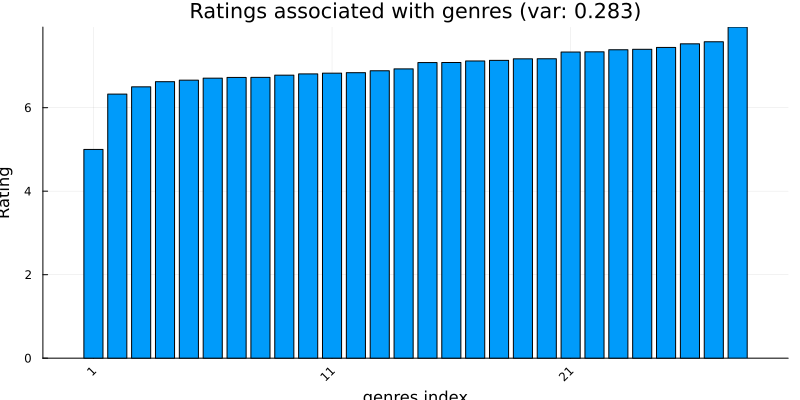

In [ ]:
visualizacion_lista_feature(genres_ratings_list, genres_list, "genres")

In [ ]:
crew_list, crew_ratings_list = generar_lista_feature(X_train, y_train, :crew);

In [ ]:
crew_list

187088-element Vector{String}:
 "Özlem Balci"
 "Jodi"
 "Dyler"
 "Hüdaverdi Yavuz"
 "Volkan Basaran"
 "Aydin Iz"
 "Fay Fouad"
 "Majed Fawaz"
 "Ayhan Eroglu"
 "Shady Al Ramly"
 "Zyad Bin Hijab"
 "Ahmad Alsheikh"
 "Mayssa Maghrebi"
 ⋮
 "Bonnie Wild"
 "Travis Richey"
 "Francesca P. Roberts"
 "Jan Ricica"
 "Mark Gessner"
 "Reid Bennett"
 "Ichitarô Ai"
 "Cecil Baldwin"
 "Yuji Takada"
 "Hunter Barnett"
 "Jade Dennis"
 "Jahneer E. Williams"

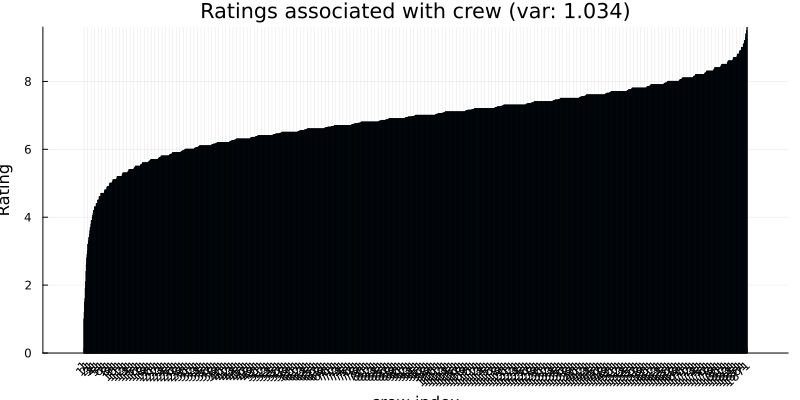

In [ ]:
visualizacion_lista_feature(crew_ratings_list, crew_list, "crew")

In [ ]:
keywords_list, keywords_ratings_list = generar_lista_feature(X_train, y_train, :keywords);

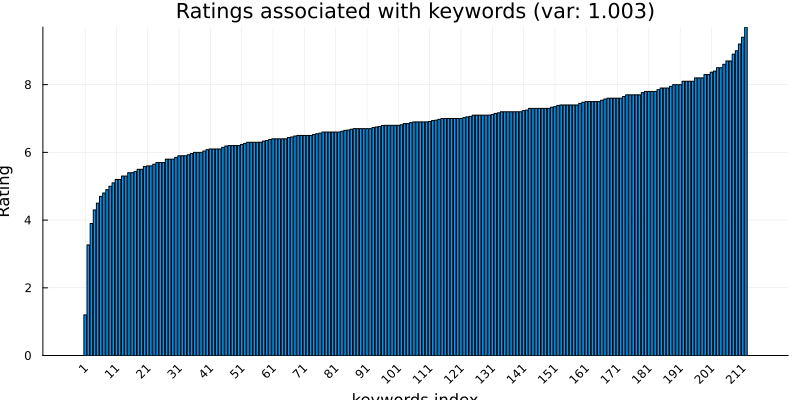

In [ ]:
visualizacion_lista_feature(keywords_ratings_list, keywords_list, "keywords")

In [ ]:
country_list, country_ratings_list = generar_lista_feature(X_train, y_train, :country);

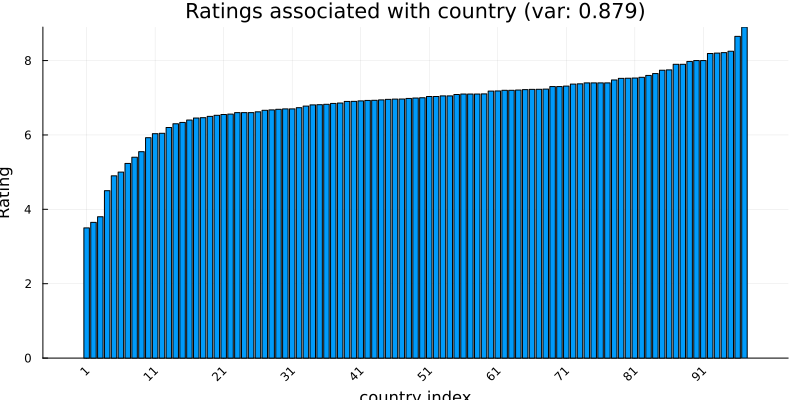

In [ ]:
visualizacion_lista_feature(country_ratings_list, country_list, "country")

In [ ]:
companies_list, companies_ratings_list = generar_lista_feature(X_train, y_train, :companies);

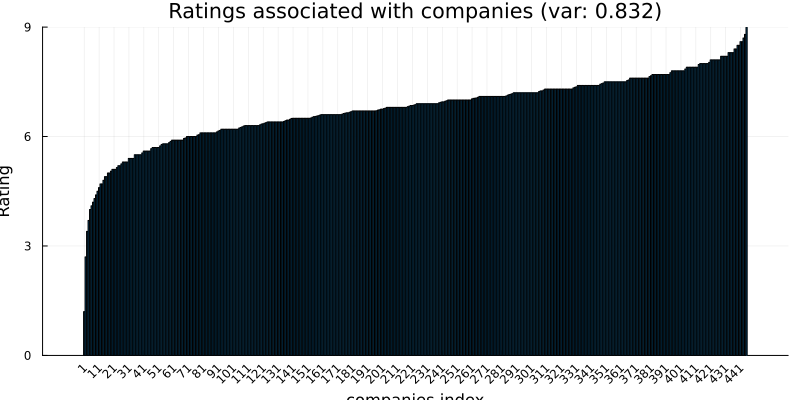

In [ ]:
visualizacion_lista_feature(companies_ratings_list, companies_list, "companies")

GENEROS Y PAÍSES NO SON TAN BUENOS PARA LA PREDICCION???

In [ ]:
function array_a_binario(lista_feature::Union{Missing, Vector{String}}, full_lista_feature::Vector{String})
    if ismissing(lista_feature)
        return missing
    end

    set_feature = Set(lista_feature)
    lista_feature_binario = zeros(Int8, length(full_lista_feature))

    for (i, feature) in enumerate(full_lista_feature)
        if feature in set_feature
            lista_feature_binario[i] = 1
        end
    end

    return Int8.(lista_feature_binario)
end

array_a_binario (generic function with 1 method)

In [ ]:
X_train[:, :genres_binary] .= [array_a_binario(row.genres, genres_list) for row in eachrow(X_train)]
select!(X_train, Not(:genres));

In [ ]:
X_train[:, :country_binary] .= [array_a_binario(row.country, country_list) for row in eachrow(X_train)]
select!(X_train, Not(:country));

In [ ]:
X_train[:, :crew_binary] .= [array_a_binario(row.crew, crew_list) for row in eachrow(X_train)]
select!(X_train, Not(:crew));

In [ ]:
X_train[:, :keywords_binary] .= [array_a_binario(row.keywords, keywords_list) for row in eachrow(X_train)]
select!(X_train, Not(:keywords));

In [ ]:
X_train[:, :companies_binary] .= [array_a_binario(row.companies, companies_list) for row in eachrow(X_train)]
select!(X_train, Not(:companies));

In [ ]:
X_train

Row,imdbId,type,votes,reviews,releaseYear,genres_binary,country_binary,crew_binary,keywords_binary,companies_binary
,String15,String15,Float64,Float64?,Int64,Array…,Array…?,Array…?,Array…?,Array…?
1,tt3722070,movie,32023.0,50.73,2015,"Int8[0, 0, 0, 0, 0, 0, 1, 0, 0, 0 … 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]","Int8[0, 0, 0, 0, 0, 0, 0, 0, 0, 0 … 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","Int8[0, 0, 0, 0, 0, 0, 0, 0, 0, 0 … 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","Int8[0, 0, 0, 0, 0, 0, 0, 0, 0, 0 … 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","Int8[0, 0, 0, 0, 0, 0, 0, 0, 0, 0 … 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,tt3318220,tvMovie,16177.0,56.6,2014,"Int8[0, 0, 0, 0, 0, 0, 0, 1, 0, 0 … 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","Int8[0, 0, 0, 0, 0, 0, 0, 0, 0, 0 … 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","Int8[0, 0, 0, 0, 0, 0, 0, 0, 0, 0 … 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","Int8[0, 0, 0, 0, 0, 0, 0, 0, 0, 0 … 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","Int8[0, 0, 0, 0, 0, 0, 0, 0, 0, 0 … 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,tt1982229,tvSeries,6635.0,11.42,2011,"Int8[0, 0, 0, 0, 1, 0, 0, 1, 0, 0 … 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","Int8[0, 0, 0, 0, 0, 0, 0, 0, 0, 0 … 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","Int8[0, 0, 0, 0, 0, 0, 0, 0, 0, 0 … 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","Int8[0, 0, 0, 0, 0, 0, 0, 0, 0, 0 … 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","Int8[0, 0, 0, 0, 0, 0, 0, 0, 0, 0 … 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,tt2911666,movie,740179.0,2.59,2014,"Int8[0, 0, 0, 0, 1, 0, 0, 0, 0, 0 … 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","Int8[0, 0, 0, 0, 0, 0, 0, 0, 0, 0 … 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","Int8[0, 0, 0, 0, 0, 0, 0, 0, 0, 0 … 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","Int8[0, 0, 0, 0, 0, 0, 0, 0, 0, 0 … 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","Int8[0, 0, 0, 0, 0, 0, 0, 0, 0, 0 … 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
5,tt1476425,movie,14422.0,missing,2016,"Int8[0, 0, 0, 0, 1, 0, 0, 0, 0, 0 … 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","Int8[0, 0, 0, 0, 0, 0, 0, 0, 0, 0 … 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","Int8[0, 0, 0, 0, 0, 0, 0, 0, 0, 0 … 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","Int8[0, 0, 0, 0, 0, 0, 0, 0, 0, 0 … 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","Int8[0, 0, 0, 0, 0, 0, 0, 0, 0, 0 … 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
6,tt0606115,tvEpisode,6838.0,missing,2005,"Int8[0, 0, 0, 0, 0, 0, 1, 1, 0, 0 … 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",missing,"Int8[0, 0, 0, 0, 0, 0, 0, 0, 0, 0 … 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",missing,missing
7,tt1594562,movie,37280.0,16.84,2011,"Int8[0, 1, 0, 0, 0, 0, 0, 0, 0, 0 … 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","Int8[0, 0, 0, 0, 0, 0, 0, 0, 0, 0 … 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","Int8[0, 0, 0, 0, 0, 0, 0, 0, 0, 0 … 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","Int8[0, 0, 0, 0, 0, 0, 0, 0, 0, 0 … 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","Int8[0, 0, 0, 0, 0, 0, 0, 0, 0, 0 … 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
8,tt2235108,movie,26573.0,46.31,2014,"Int8[0, 0, 0, 0, 0, 0, 1, 1, 0, 0 … 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","Int8[0, 0, 0, 0, 0, 0, 0, 0, 0, 0 … 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","Int8[0, 0, 0, 0, 0, 0, 0, 0, 0, 0 … 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","Int8[0, 0, 0, 0, 0, 0, 0, 0, 0, 0 … 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","Int8[0, 0, 0, 0, 0, 0, 0, 0, 0, 0 … 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
9,tt0364647,movie,7789.0,64.12,2004,"Int8[0, 0, 0, 0, 0, 0, 0, 0, 0, 0 … 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","Int8[0, 0, 0, 0, 0, 0, 0, 0, 0, 0 … 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","Int8[0, 0, 0, 0, 0, 0, 0, 0, 0, 0 … 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","Int8[0, 0, 0, 0, 0, 0, 0, 0, 0, 0 … 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","Int8[0, 0, 0, 0, 0, 0, 0, 0, 0, 0 … 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [ ]:
function dividir_array(array, n)
    return [array[i:min(i+n-1, end)] for i in 1:n:length(array)]
end

dividir_array (generic function with 1 method)

In [ ]:
function encontrar_concentraciones(array_binario, n)
    if ismissing(array_binario)
        return missing
    end

    batches = dividir_array(array_binario, div(length(array_binario), n))
    concentraciones = Tuple{Float64, Int}[]
    for (i, batch) in enumerate(batches)
        punto = 0.0
        cantidad_unos = 0
        for (j, valor) in enumerate(batch)
            if valor == 1
                punto += j + (i - 1) * div(length(array_binario), n)
                cantidad_unos += 1
            end
        end
        if cantidad_unos > 0
            punto /= cantidad_unos
            push!(concentraciones, (punto, cantidad_unos))
        end
    end
    return concentraciones
end

encontrar_concentraciones (generic function with 1 method)

In [ ]:
function a_concentraciones!(df::DataFrame, nombre_feature::Symbol, n::Int64)
    df[!, nombre_feature] = encontrar_concentraciones.(df[!, nombre_feature], n)
  end

a_concentraciones! (generic function with 1 method)

In [ ]:
country_list

97-element Vector{String}:
 "RU"
 "AW"
 "PH"
 "BS"
 "PR"
 "QA"
 "SA"
 "MA"
 "Czechoslovakia"
 "GE"
 "LU"
 "ZA"
 "KZ"
 ⋮
 "JP"
 "TN"
 "Republic of Macedonia"
 "Soviet Union"
 "North Macedonia"
 "EE"
 "EG"
 "AZ"
 "Federal Republic of Yugoslavia"
 "LB"
 "LK"
 "Libya"

In [ ]:
a_concentraciones!(X_train, :genres_binary, Int64(ceil(log2(length(genres_list))))); #que n sea un calculo sobre la longitud del array...
rename!(X_train, :genres_binary => :genres_concentrations);

In [ ]:
a_concentraciones!(X_train, :country_binary, Int64(ceil(log2(length(country_list)))));
rename!(X_train, :country_binary => :country_concentrations);

In [ ]:
a_concentraciones!(X_train, :keywords_binary, Int64(ceil(log2(length(keywords_list)))));
rename!(X_train, :keywords_binary => :keywords_concentrations);

In [ ]:
a_concentraciones!(X_train, :crew_binary, Int64(ceil(log2(length(crew_list)))));
rename!(X_train, :crew_binary => :crew_concentrations);

In [ ]:
a_concentraciones!(X_train, :companies_binary, Int64(ceil(log2(length(companies_list)))));
rename!(X_train, :companies_binary => :companies_concentrations);

In [ ]:
X_train

Row,imdbId,type,votes,reviews,releaseYear,genres_concentrations,country_concentrations,crew_concentrations,keywords_concentrations,companies_concentrations
,String15,String15,Float64,Float64?,Int64,Array…,Array…?,Array…?,Array…?,Array…?
1,tt3722070,movie,32023.0,50.73,2015,"[(7.0, 1), (19.5, 2)]","[(48.0, 1)]","[(76605.6, 7), (87207.7, 3), (94753.0, 1), (109828.0, 2), (118092.0, 1), (1.26904e5, 2)]","[(9230.0, 1), (12355.0, 2), (13290.0, 1), (15730.0, 1)]","[(15498.3, 3), (17909.0, 1), (20300.3, 3), (22257.0, 1), (25926.7, 3), (30372.0, 1), (31808.5, 2), (40387.0, 1)]"
2,tt3318220,tvMovie,16177.0,56.6,2014,"[(8.0, 1), (14.0, 1), (19.0, 1)]","[(32.0, 1)]","[(86634.5, 2), (104481.0, 1), (1.29646e5, 8)]","[(11293.0, 1), (13075.0, 1), (14858.3, 3)]","[(30045.0, 1), (32816.0, 1)]"
3,tt1982229,tvSeries,6635.0,11.42,2011,"[(5.0, 1), (8.0, 1), (13.0, 1)]","[(78.0, 1)]","[(147065.0, 1), (164369.0, 6), (168589.0, 4)]","[(6703.0, 1), (9242.5, 2), (13141.0, 1), (18732.0, 1)]","[(41892.5, 2)]"
4,tt2911666,movie,740179.0,2.59,2014,"[(5.0, 1), (13.0, 1), (17.0, 1)]","[(27.0, 1)]","[(32017.0, 1), (56740.8, 5), (67165.6, 5), (77671.3, 3), (90568.0, 1), (1.0139e5, 2), (1.09188e5, 4), (1.17146e5, 2), (1.29916e5, 7), (141421.0, 2), (1.5418e5, 2), (1.62309e5, 3)]","[(7296.0, 1), (9232.0, 1), (10087.0, 1), (11707.0, 1), (15492.0, 1)]","[(5154.0, 1), (6700.0, 1), (9803.5, 2), (13116.6, 12), (15509.5, 4), (17512.0, 1), (20319.0, 4), (25737.0, 2), (28609.0, 1), (34115.0, 1), (37851.0, 1)]"
5,tt1476425,movie,14422.0,missing,2016,"[(5.0, 1), (11.0, 1), (19.0, 1)]","[(27.0, 1)]","[(6076.0, 8), (15909.5, 2), (41558.0, 1), (48142.0, 2)]","[(703.0, 1), (5057.0, 2), (7587.0, 1), (9483.0, 1)]","[(1531.0, 1), (6785.0, 1)]"
6,tt0606115,tvEpisode,6838.0,missing,2005,"[(7.5, 2), (19.0, 1)]",missing,"[(83109.0, 1), (1.09984e5, 2), (118287.0, 1), (141317.0, 1), (1.68406e5, 2), (1.84046e5, 3)]",missing,missing
7,tt1594562,movie,37280.0,16.84,2011,"[(2.0, 1), (11.0, 1), (19.0, 1)]","[(27.0, 1)]","[(15534.8, 14), (26024.3, 3), (34352.0, 2), (45203.2, 4), (54206.0, 2), (91400.0, 1)]","[(1883.0, 1), (2872.0, 1), (5838.0, 1), (9250.0, 1), (10479.0, 1)]","[(5074.0, 1), (6770.0, 1)]"
8,tt2235108,movie,26573.0,46.31,2014,"[(7.5, 2), (19.0, 1)]","[(27.0, 1)]","[(14756.0, 2), (29378.0, 1), (39209.9, 17), (47413.0, 1), (56498.2, 4), (68835.0, 1), (85256.0, 1), (108231.0, 1), (118495.0, 2), (130588.0, 3)]","[(4727.0, 1), (7311.0, 1), (9467.0, 1), (10726.0, 1), (12056.0, 1)]","[(3866.0, 1), (6662.0, 1), (10112.7, 3), (13286.2, 4), (21676.0, 1)]"
9,tt0364647,movie,7789.0,64.12,2004,"[(13.0, 1), (18.0, 2)]","[(47.0, 1)]","[(130342.0, 2), (150123.0, 2), (1.72218e5, 4), (1.78796e5, 5)]","[(3903.0, 1), (9098.0, 1), (14184.0, 1), (16578.0, 1), (19993.0, 1)]","[(39862.5, 2)]"


In [ ]:
function peso_promedio(array_concentraciones)
    if ismissing(array_concentraciones)
        return missing
    end

    suma_pesos = 0.0
    pesos_relativos = 0.0
    for element in array_concentraciones
        pesos_relativos += element[1] * element[2]  # posicion * peso
        suma_pesos += element[2]
    end
    return pesos_relativos / suma_pesos
end

peso_promedio (generic function with 1 method)

In [ ]:
function a_pesos_promediados!(df::DataFrame, nombre_feature::Symbol)
    df[!, nombre_feature] = peso_promedio.(df[!, nombre_feature])
end

a_pesos_promediados! (generic function with 1 method)

In [ ]:
a_pesos_promediados!(X_train, :genres_concentrations);
rename!(X_train, :genres_concentrations => :genres)
a_pesos_promediados!(X_train, :country_concentrations);
rename!(X_train, :country_concentrations => :country)
a_pesos_promediados!(X_train, :crew_concentrations);
rename!(X_train, :crew_concentrations => :crew)
a_pesos_promediados!(X_train, :keywords_concentrations);
rename!(X_train, :keywords_concentrations => :keywords)
a_pesos_promediados!(X_train, :companies_concentrations);
rename!(X_train, :companies_concentrations => :companies)

Row,imdbId,type,votes,reviews,releaseYear,genres,country,crew,keywords,companies
,String15,String15,Float64,Float64?,Int64,Float64,Float64?,Float64?,Float64?,Float64?
1,tt3722070,movie,32023.0,50.73,2015,15.3333,48.0,92760.6,12592.0,23981.2
2,tt3318220,tvMovie,16177.0,56.6,2014,13.6667,32.0,1.19538e5,13788.6,31430.5
3,tt1982229,tvSeries,6635.0,11.42,2011,8.66667,78.0,1.6433e5,11412.2,41892.5
4,tt2911666,movie,740179.0,2.59,2014,11.6667,27.0,1.03689e5,10762.8,16724.5
5,tt1476425,movie,14422.0,missing,2016,11.6667,27.0,16789.9,5577.4,4158.0
6,tt0606115,tvEpisode,6838.0,missing,2005,11.3333,missing,1.45163e5,missing,missing
7,tt1594562,movie,37280.0,16.84,2011,10.6667,27.0,28649.6,6064.4,5922.0
8,tt2235108,movie,26573.0,46.31,2014,11.3333,27.0,57270.9,8857.4,11568.7
9,tt0364647,movie,7789.0,64.12,2004,16.3333,47.0,1.64906e5,12751.2,39862.5


Reemplazamos los años de las películas con ese dato faltante por el año promedio de las películas con año definido. Un procedimiento similar haremos para los valores missing de todas las demás columnas.

In [ ]:
año_promedio = round(mean(X_train[X_train[:, :releaseYear] .!= 0, :releaseYear]))
X_train[X_train[:, :releaseYear] .== 0, :releaseYear] .= año_promedio;

In [ ]:
genero_promedio = mean(X_train[.!ismissing.(X_train.genres), :genres])
X_train[ismissing.(X_train[:, :genres]), :genres] .= genero_promedio;
X_train.genres = coalesce.(X_train.genres, 0.0);

In [ ]:
country_promedio = mean(X_train[.!ismissing.(X_train.country), :country])
X_train[ismissing.(X_train[:, :country]), :country] .= country_promedio;
X_train.country = coalesce.(X_train.country, 0.0);

In [ ]:
crew_promedio = mean(X_train[.!ismissing.(X_train.crew), :crew])
X_train[ismissing.(X_train[:, :crew]), :crew] .= crew_promedio;
X_train.crew = coalesce.(X_train.crew, 0.0);

In [ ]:
keywords_promedio = mean(X_train[.!ismissing.(X_train.keywords), :keywords])
X_train[ismissing.(X_train[:, :keywords]), :keywords] .= keywords_promedio;
X_train.keywords = coalesce.(X_train.keywords, 0.0);

In [ ]:
companies_promedio = mean(X_train[.!ismissing.(X_train.companies), :companies])
X_train[ismissing.(X_train[:, :companies]), :companies] .= companies_promedio;
X_train.companies = coalesce.(X_train.companies, 0.0);

In [ ]:
X_train[ismissing.(X_train[:, :reviews]), :reviews] .= 0.0;
X_train.reviews = coalesce.(X_train.reviews, 0.0);

In [ ]:
@sk_import preprocessing: MinMaxScaler;

[ Info: Downloading miniconda installer ...


PREFIX=/root/.julia/conda/3/x86_64


[ Info: Installing miniconda ...


Unpacking payload ...
Extracting _libgcc_mutex-0.1-conda_forge.tar.bz2
Extracting ca-certificates-2024.2.2-hbcca054_0.conda
Extracting ld_impl_linux-64-2.40-h41732ed_0.conda
Extracting libstdcxx-ng-13.2.0-h7e041cc_5.conda
Extracting pybind11-abi-4-hd8ed1ab_3.tar.bz2
Extracting python_abi-3.10-4_cp310.conda
Extracting tzdata-2024a-h0c530f3_0.conda
Extracting libgomp-13.2.0-h807b86a_5.conda
Extracting _openmp_mutex-4.5-2_gnu.tar.bz2
Extracting libgcc-ng-13.2.0-h807b86a_5.conda
Extracting bzip2-1.0.8-hd590300_5.conda
Extracting c-ares-1.28.1-hd590300_0.conda
Extracting fmt-10.2.1-h00ab1b0_0.conda
Extracting icu-73.2-h59595ed_0.conda
Extracting keyutils-1.6.1-h166bdaf_0.tar.bz2
Extracting libev-4.33-hd590300_2.conda
Extracting libffi-3.4.2-h7f98852_5.tar.bz2
Extracting libiconv-1.17-hd590300_2.conda
Extracting libnsl-2.0.1-hd590300_0.conda
Extracting libuuid-2.38.1-h0b41bf4_0.conda
Extracting libxcrypt-4.4.36-hd590300_1.conda
Extracting libzlib-1.2.13-hd590300_5.conda
Extracting lz4-c-1.9.

[ Info: Running `conda install -y -c anaconda conda` in root environment


Channels:
 - anaconda
 - conda-forge
Platform: linux-64
Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
    current version: 24.3.0
    latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c conda-forge conda


[ Info: Running `conda install -y -c conda-forge 'libstdcxx-ng>=3.4,<13.0'` in root environment


Channels:
 - conda-forge
Platform: linux-64
Solving environment: ...working... done




==> WARNING: A newer version of conda exists. <==
    current version: 24.3.0
    latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c conda-forge conda





## Package Plan ##

  environment location: /root/.julia/conda/3/x86_64

  added / updated specs:
    - libstdcxx-ng[version='>=3.4,<13.0']


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.6.2   |       hbcca054_0         152 KB  conda-forge
    certifi-2024.6.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    libgcc-ng-12.4.0           |       h77fa898_0         762 KB  conda-forge
    libgomp-12.4.0             |       h77fa898_0         408 KB  conda-forge
    libstdcxx-ng-12.4.0        |       hc0a3c3a_0         3.3 MB  conda-forge
    openssl-3.3.1              |       h4ab18f5_1         2.8 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         7.5 MB

The following packages will be UPDATED:

  ca-certificates                       2024.2.2-hbcca054_0 --> 2024.6.2-

In [ ]:
scaler = MinMaxScaler()

PyObject MinMaxScaler()

In [ ]:
columnas_a_escalar = [:keywords, :genres, :crew, :companies, :country, :reviews]
X_train_escalado = Matrix(X_train[!, columnas_a_escalar]);

In [ ]:
X_train_escalado

17000×6 Matrix{Float64}:
 12592.0  15.3333    92760.6        23981.2  48.0      50.73
 13788.6  13.6667        1.19538e5  31430.5  32.0      56.6
 11412.2   8.66667       1.6433e5   41892.5  78.0      11.42
 10762.8  11.6667        1.03689e5  16724.5  27.0       2.59
  5577.4  11.6667    16789.9         4158.0  27.0       0.0
 10042.6  11.3333        1.45163e5  20974.6  35.9405    0.0
  6064.4  10.6667    28649.6         5922.0  27.0      16.84
  8857.4  11.3333    57270.9        11568.7  27.0      46.31
 12751.2  16.3333        1.64906e5  39862.5  47.0      64.12
 12042.2  15.6667   106742.0        17894.9  27.0       0.0
  6247.6  12.0       48191.2        15304.7  27.0      32.94
  6304.6  13.5       62282.8        12012.1  17.0      -2.22
 12120.4  15.0           1.18387e5  20770.5  27.0      53.55
     ⋮                                                  ⋮
 10536.0  11.3333    72156.2        15649.6  27.0      46.85
  8253.4   7.0           1.09576e5  20543.9  27.0      49.28
 15148

In [ ]:
X_train_escalado = fit_transform!(scaler, X_train_escalado);

In [ ]:
X_train[!, columnas_a_escalar] = X_train_escalado;

In [ ]:
X_train

Row,imdbId,type,votes,reviews,releaseYear,genres,country,crew,keywords,companies
,String15,String15,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Float64
1,tt3722070,movie,32023.0,0.641424,2015,0.544218,0.489583,0.495394,0.594871,0.539155
2,tt3318220,tvMovie,16177.0,0.669937,2014,0.47619,0.322917,0.638766,0.651967,0.706647
3,tt1982229,tvSeries,6635.0,0.450478,2011,0.272109,0.802083,0.878589,0.538576,0.941878
4,tt2911666,movie,740179.0,0.407587,2014,0.394558,0.270833,0.553907,0.507589,0.375994
5,tt1476425,movie,14422.0,0.395007,2016,0.394558,0.270833,0.0886364,0.260165,0.0934447
6,tt0606115,tvEpisode,6838.0,0.395007,2005,0.380952,0.363964,0.775965,0.473225,0.471555
7,tt1594562,movie,37280.0,0.476806,2011,0.353741,0.270833,0.152135,0.283402,0.133107
8,tt2235108,movie,26573.0,0.619954,2014,0.380952,0.270833,0.305377,0.416672,0.260069
9,tt0364647,movie,7789.0,0.706465,2004,0.585034,0.479167,0.881673,0.602467,0.896235


In [ ]:
X_train_csv = "/content/gdrive/MyDrive/tdl/x_train_v.csv"

"/content/gdrive/MyDrive/tdl/x_train_v.csv"

In [ ]:
CSV.write(X_train_csv, X_train)

"/content/gdrive/MyDrive/tdl/x_train_v.csv"

Falta tomar una decisión sobre los missing en cada columna y sobre los "años 0", con esto podemos aplicar el scaler a los floats que generamos

# Encodeo Validation

In [ ]:
X_valid

Row,imdbId,type,genres,votes,reviews,country,keywords,companies,releaseYear,crew
,String15,String15,Array…?,Float64,Float64?,Array…?,Array…?,Array…?,Int64,Array…?
1,tt5895028,movie,"[""Crime"", ""Documentary"", ""History""]",37706.0,-2.89,"[""US""]","[""prison"", ""greed"", ""discrimination"", ""american politics"", ""black lives matter""]","[""A52"", ""Elastic"", ""Eric Feig Entertainment & Media Law"", ""HUB International Insurance Services"", ""Media Services""]",2016,"[""Craig DeRoche"", ""Melina Abdullah"", ""Michelle Alexander"", ""Cory Booker"", ""Dolores Canales"", ""Gina Clayton"", ""Jelani Cobb"", ""Malkia Cyril"", ""Angela Davis"", ""David Dinkins"", ""Howard Barish"", ""Jason Sterman"", ""Mercedes Yolanda Cooper"", ""Ekin Akalin"", ""Lauren Dellara"", ""Deborah Small""]"
2,tt0060438,movie,"[""Comedy"", ""Musical""]",9859.0,66.45,"[""US""]","[""based on stage musical"", ""cross dressing"", ""identity swap"", ""child kidnapping"", ""kidnapping""]","[""C.T.S. Studios"", ""Samuel Bronston Española"", ""Richard Williams Films""]",1966,"[""Alfie Bass"", ""Zero Mostel"", ""Phil Silvers"", ""Buster Keaton"", ""Michael Crawford"", ""Jack Gilford"", ""Annette Andre"", ""Michael Hordern"", ""Leon Greene"", ""Roy Kinnear"", ""Richard Bryan""]"
3,tt0087298,movie,"[""Horror"", ""Thriller""]",59254.0,21.81,"[""US""]","[""slasher"", ""serial killer"", ""jason voorhees"", ""friday the thirteenth"", ""deeply disturbed person""]","[""Blue Light Sound"", ""Brooks Athletic Shoes"", ""Catalina Swimwear"", ""Complete Casting"", ""Converse"", ""Creative Film Arts"", ""Friday Four Films Inc."", ""\\""Mickey's Food Service\\"""", ""Modern Film Effects"", ""Movielab"", ""Panavision"", ""Radio Shack"", ""Ryder Sound Services"", ""Sasson Ladies Activewear"", ""Scenic Express"", ""Sega Enterprises"", ""Steagall Designs"", ""Studio Animal Services"", ""Tandy Corporation""]",1984,"[""Crispin Glover"", ""Erich Anderson"", ""Judie Aronson"", ""Peter Barton"", ""Kimberly Beck"", ""Tom Everett"", ""Corey Feldman"", ""Joan Freeman"", ""Lisa Freeman"", ""Thad Geer"", ""Tony Bishop"", ""John Lytle"", ""Bruce Hidemi Sakow"", ""Larry Secrist"", ""Joseph Zito"", ""Tom Recchion"", ""Michael Mersereau"", ""Joe Hoffman""]"
4,tt0080684,movie,"[""Action"", ""Adventure"", ""Fantasy""]",1.38169e6,32.66,"[""US""]","[""famous twist"", ""part of trilogy"", ""the force"", ""duel"", ""rescue""]","[""The London Symphony Orchestra (LSO)"", ""Fox Fanfare Music"", ""Bantha Music"", ""Lee Lighting"", ""George Randle Co."", ""J.L. Wood Optical Systems"", ""Fries Engineering"", ""Mitchell Camera"", ""Hill Production Services"", ""Van der Veer Photo Effects"" … ""Flying Pictures"", ""IVC"", ""Lowry Digital Images"", ""Mayflower Recording"", ""Motion Picture Association of America (MPAA)"", ""Panavision"", ""Persuasiva"", ""Rank Film Laboratories"", ""Sony Classical"", ""THX Ltd.""]",1980,"[""Alec Guinness"", ""Mark Hamill"", ""Harrison Ford"", ""Carrie Fisher"", ""Billy Dee Williams"", ""Anthony Daniels"", ""David Prowse"", ""Peter Mayhew"", ""Kenny Baker"", ""Frank Oz"" … ""Bruce Nicholson"", ""Richard Oldfield"", ""Norman Reynolds"", ""Kate Robinson"", ""Bruce Sharman"", ""Ola Solum"", ""Alan Tomkins"", ""Robert Watts"", ""Charles B. Wessler"", ""Bill Westley""]"
5,tt3082854,movie,"[""Drama""]",8248.0,23.75,"[""DK""]","[""commune"", ""1970s"", ""teacher student relationship"", ""marriage"", ""infidelity""]","[""Kameraudlejningen"", ""Klippegangen ApS"", ""Mainstream ApS"", ""Montclair Film Festival"", ""Toronto International Film Festival""]",2016,"[""Jakob Højlev Jørgensen"", ""Trine Dyrholm"", ""Fares Fares"", ""Ulrich Thomsen"", ""Lars Ranthe"", ""Julie Agnete Vang"", ""Magnus Millang"", ""Helene Reingaard Neumann"", ""Mads Reuther"", ""Ida Maria Vinterberg"", ""Mickey Smid"", ""Alexander Skaarup Nielsen"", ""Jakob Kromann Groth""]"
6,tt0063518,movie,"[""Drama"", ""Romance""]",34812.0,45.74,"[""GB""]","[""forbidden love"", ""tragedy"", ""family feud"", ""star crossed lov

Seguramente haya géneros, actores, directores, keywords y países que no estén en las listas obtenidas del train. Obtenerlas desde acá sería filtrar el target. Hay que tomar una decisión sobre cómo cosiderar estos elementos para el encodeo. (QUEDAN COMO NaN POR HACER 0/0)

Sería correcto que, si no se encuentra nada en la lista, asignar un número que sea el promedio de las demás??? (lo mismo podría hacerse con los missing o con los "año 0).

In [ ]:
X_valid[:, :genres_binary] .= [array_a_binario(row.genres, genres_list) for row in eachrow(X_valid)]
select!(X_valid, Not(:genres));

In [ ]:
X_valid[:, :country_binary] .= [array_a_binario(row.country, country_list) for row in eachrow(X_valid)]
select!(X_valid, Not(:country));

In [ ]:
X_valid[:, :keywords_binary] .= [array_a_binario(row.keywords, keywords_list) for row in eachrow(X_valid)]
select!(X_valid, Not(:keywords));

In [ ]:
X_valid[:, :crew_binary] .= [array_a_binario(row.crew, crew_list) for row in eachrow(X_valid)]
select!(X_valid, Not(:crew));

In [ ]:
X_valid[:, :companies_binary] .= [array_a_binario(row.companies, companies_list) for row in eachrow(X_valid)]
select!(X_valid, Not(:companies));

In [ ]:
a_concentraciones!(X_valid, :genres_binary, 4);
rename!(X_valid, :genres_binary => :genres_concentrations);
a_concentraciones!(X_valid, :country_binary, 7);
rename!(X_valid, :country_binary => :country_concentrations);
a_concentraciones!(X_valid, :crew_binary, 100);
rename!(X_valid, :crew_binary => :crew_concentrations);
a_concentraciones!(X_valid, :keywords_binary, 100);
rename!(X_valid, :keywords_binary => :keywords_concentrations);
a_concentraciones!(X_valid, :companies_binary, 100);
rename!(X_valid, :companies_binary => :companies_concentrations);

In [ ]:
a_pesos_promediados!(X_valid, :genres_concentrations);
rename!(X_valid, :genres_concentrations => :genres)
a_pesos_promediados!(X_valid, :country_concentrations);
rename!(X_valid, :country_concentrations => :country)
a_pesos_promediados!(X_valid, :crew_concentrations);
rename!(X_valid, :crew_concentrations => :crew)
a_pesos_promediados!(X_valid, :keywords_concentrations);
rename!(X_valid, :keywords_concentrations => :keywords)
a_pesos_promediados!(X_valid, :companies_concentrations);
rename!(X_valid, :companies_concentrations => :companies)

Row,imdbId,type,votes,reviews,releaseYear,genres,country,keywords,crew,companies
,String15,String15,Float64,Float64?,Int64,Float64,Float64?,Float64?,Float64?,Float64?
1,tt5895028,movie,37706.0,-2.89,2016,21.0,27.0,12583.0,1.44903e5,24914.4
2,tt0060438,movie,9859.0,66.45,1966,8.0,27.0,9051.4,1.0699e5,15160.0
3,tt0087298,movie,59254.0,21.81,1984,3.5,27.0,2683.75,44660.2,15043.6
4,tt0080684,movie,1.38169e6,32.66,1980,13.3333,27.0,8324.25,1.20535e5,21977.1
5,tt3082854,movie,8248.0,23.75,2016,19.0,59.0,12177.0,1.21326e5,26304.6
6,tt0063518,movie,34812.0,45.74,1968,13.5,48.0,13922.0,99037.2,26437.0
7,tt0292246,movie,6860.0,31.5,1995,16.0,47.0,11874.8,1.51296e5,NaN
8,tt2283748,movie,65434.0,85.22,2012,12.6667,47.0,7258.33,83183.7,18828.5
9,tt1802197,movie,11301.0,59.96,2011,20.0,41.0,11876.4,73409.7,17603.9


In [ ]:
X_valid[X_valid[:, :releaseYear] .== 0, :releaseYear] .= año_promedio;

In [ ]:
X_valid[ismissing.(X_valid[:, :genres]), :genres] .= genero_promedio;
X_valid[isnan.(X_valid[:, :genres]), :genres] .= genero_promedio;
X_valid.genres = coalesce.(X_valid.genres, 0.0);

In [ ]:
X_valid[ismissing.(X_valid[:, :country]), :country] .= country_promedio;
X_valid[isnan.(X_valid[:, :country]), :country] .= country_promedio;
X_valid.country = coalesce.(X_valid.country, 0.0);

In [ ]:
X_valid[ismissing.(X_valid[:, :keywords]), :keywords] .= keywords_promedio;
X_valid[isnan.(X_valid[:, :keywords]), :keywords] .= keywords_promedio;
X_valid.keywords = coalesce.(X_valid.keywords, 0.0);

In [ ]:
X_valid[ismissing.(X_valid[:, :crew]), :crew] .= crew_promedio;
X_valid[isnan.(X_valid[:, :crew]), :crew] .= crew_promedio;
X_valid.crew = coalesce.(X_valid.crew, 0.0);

In [ ]:
X_valid[ismissing.(X_valid[:, :companies]), :companies] .= companies_promedio;
X_valid[isnan.(X_valid[:, :companies]), :companies] .= companies_promedio;
X_valid.companies = coalesce.(X_valid.companies, 0.0);

In [ ]:
X_valid[ismissing.(X_valid[:, :reviews]), :reviews] .= 0.0;
X_valid.reviews = coalesce.(X_valid.reviews, 0.0);

In [ ]:
X_valid_escalado = Matrix(X_valid[!, columnas_a_escalar]);

In [ ]:
X_valid_escalado

3000×6 Matrix{Float64}:
 12583.0   21.0         1.44903e5  24914.4  27.0      -2.89
  9051.4    8.0         1.0699e5   15160.0  27.0      66.45
  2683.75   3.5     44660.2        15043.6  27.0      21.81
  8324.25  13.3333      1.20535e5  21977.1  27.0      32.66
 12177.0   19.0         1.21326e5  26304.6  59.0      23.75
 13922.0   13.5     99037.2        26437.0  48.0      45.74
 11874.8   16.0         1.51296e5  20974.6  47.0      31.5
  7258.33  12.6667  83183.7        18828.5  47.0      85.22
 11876.4   20.0     73409.7        17603.9  41.0      59.96
  9553.0    7.5     78670.7        15892.7  29.0      38.6
 17247.0   10.6667      1.36258e5  40354.0  27.0       0.0
 10446.6    7.0     85844.0        36349.0  27.0       0.0
  3272.67   7.0     87194.1        14504.7  27.0      28.0
     ⋮                                                 ⋮
 10042.6   13.0     81674.2        11413.0  35.9405    0.0
 12249.5   19.0         1.07775e5  20974.6  48.0      47.96
  8417.4   15.6667  87191

In [ ]:
X_valid_escalado = fit_transform!(scaler, X_valid_escalado);

In [ ]:
X_valid[!, columnas_a_escalar] = X_valid_escalado;

In [ ]:
X_valid

Row,imdbId,type,votes,reviews,releaseYear,genres,country,keywords,crew,companies
,String15,String15,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Float64
1,tt5895028,movie,37706.0,0.383897,2016,0.826087,0.277778,0.579053,0.776402,0.559718
2,tt0060438,movie,9859.0,0.712492,1966,0.26087,0.277778,0.401568,0.573154,0.339687
3,tt0087298,movie,59254.0,0.500948,1984,0.0652174,0.277778,0.0815534,0.239017,0.337062
4,tt0080684,movie,1.38169e6,0.552365,1980,0.492754,0.277778,0.365024,0.645767,0.493462
5,tt3082854,movie,8248.0,0.510141,2016,0.73913,0.633333,0.558649,0.65001,0.591076
6,tt0063518,movie,34812.0,0.614349,1968,0.5,0.511111,0.646346,0.530522,0.594063
7,tt0292246,movie,6860.0,0.546868,1995,0.608696,0.5,0.543462,0.81067,0.470848
8,tt2283748,movie,65434.0,0.801441,2012,0.463768,0.5,0.311455,0.445535,0.422438
9,tt1802197,movie,11301.0,0.681736,2011,0.782609,0.433333,0.543542,0.393138,0.394814


In [ ]:
X_valid_csv = "/content/gdrive/MyDrive/tdl/x_valid_rv.csv"

"/content/gdrive/MyDrive/tdl/x_valid_rv.csv"

In [ ]:
CSV.write(X_valid_csv, X_valid)

"/content/gdrive/MyDrive/tdl/x_valid_rv.csv"

# Regresión lineal

In [ ]:
X_train_movies = X_train[:, :imdbId]
select!(X_train, Not(:imdbId));

In [ ]:
select!(X_train, Not(:type)); #POR AHORA ---> ¿QUE PODEMOS HACER??

In [ ]:
X_train = hcat(X_train, y_train)
rename!(X_train, :x1 => :target);

In [ ]:
modelo = lm(@formula(target ~ votes + reviews + releaseYear + keywords + companies + crew), X_train) # MEJORA UN POCO SIN genres NI country

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

target ~ 1 + votes + reviews + releaseYear + keywords + companies + crew

Coefficients:
─────────────────────────────────────────────────────────────────────────────────
                   Coef.   Std. Error       t  Pr(>|t|)    Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────────────
(Intercept)   0.342936    0.442456       0.78    0.4383  -0.524324     1.2102
votes         6.531e-7    2.73514e-8    23.88    <1e-99   5.99488e-7   7.06711e-7
reviews       0.371262    0.0289947     12.80    <1e-36   0.31443      0.428095
releaseYear   0.00188848  0.000217779    8.67    <1e-17   0.00146161   0.00231535
keywords      0.84619     0.0337996     25.04    <1e-99   0.779939     0.91244
companies    -0.224535    0.0274707     -8.17    <1e-15  -0.27838     -0

In [ ]:
predicciones_train = GLM.predict(modelo, X_train) #GLM para no confundir con predict de sklearn

17000-element Vector{Union{Missing, Float64}}:
 6.999626325271809
 7.648287063836741
 8.47604236003091
 7.597235939396549
 4.900765307933339
 8.036728899244295
 5.230655603263535
 6.050381643093966
 8.636684000589764
 7.232953432323535
 5.639094757052234
 5.960885117340122
 7.6018389346484145
 ⋮
 6.663033277958233
 7.10027706051998
 8.12950857840957
 6.406403246965526
 8.004389940749094
 7.55282038487695
 5.680548618925261
 8.949006486359902
 6.394354086162161
 5.249023471131185
 7.680144458554853
 8.594764876524632

In [ ]:
y_train

17000-element Vector{Float64}:
 6.7
 7.4
 8.0
 7.4
 4.9
 9.1
 5.5
 6.2
 8.4
 7.3
 5.7
 6.3
 7.9
 ⋮
 6.8
 7.2
 7.6
 6.9
 7.6
 7.2
 6.0
 8.6
 6.4
 5.8
 8.7
 9.3

In [ ]:
function mse(y_real, y_pred)
    n = length(y_real)
    mse = sum((y_real .- y_pred).^2) / n
    return mse
end

mse (generic function with 1 method)

In [ ]:
function r2_score(y_real, y_pred)
    y_mean = mean(y_real)
    ss_total = sum((y_real .- y_mean).^2)
    ss_res = sum((y_real .- y_pred).^2)
    r2 = 1.0 - (ss_res / ss_total)
    return r2
end

r2_score (generic function with 1 method)

In [ ]:
mse(y_train, predicciones_train)

0.23856008305514206

In [ ]:
r2_score(y_train, predicciones_train)

0.8409654558317088

In [ ]:
X_valid_movies = X_valid[:, :imdbId]
select!(X_valid, Not(:imdbId));

In [ ]:
select!(X_valid, Not(:type));

In [ ]:
predicciones_valid = GLM.predict(modelo, X_valid)

3000-element Vector{Union{Missing, Float64}}:
 8.14524063164198
 7.147119390802349
 5.373982048230936
 8.268539505043737
 7.584707379692764
 7.090578170749417
 8.288657348640058
 6.639140316487318
 6.526297110977993
 6.575416308995454
 8.067708755580806
 6.579543700807893
 6.468694633696787
 ⋮
 6.5372918550186805
 7.3765340876940595
 6.677316824546178
 6.143609553393242
 6.51837280779831
 6.277379643977637
 8.410590165402224
 7.174329917323288
 7.536557134688277
 6.892619625353463
 5.731439633084827
 6.698996503714797

In [ ]:
y_valid

3000-element Vector{Float64}:
 8.2
 6.8
 6.0
 8.7
 6.4
 7.6
 8.6
 8.1
 7.0
 6.4
 9.1
 6.2
 5.7
 ⋮
 8.1
 7.3
 7.2
 6.1
 6.3
 6.6
 8.2
 6.5
 7.4
 7.7
 5.2
 6.2

In [ ]:
mse(y_valid, predicciones_valid)

0.8680296360506015

In [ ]:
r2_score(y_valid, predicciones_valid)

0.42395508709219576